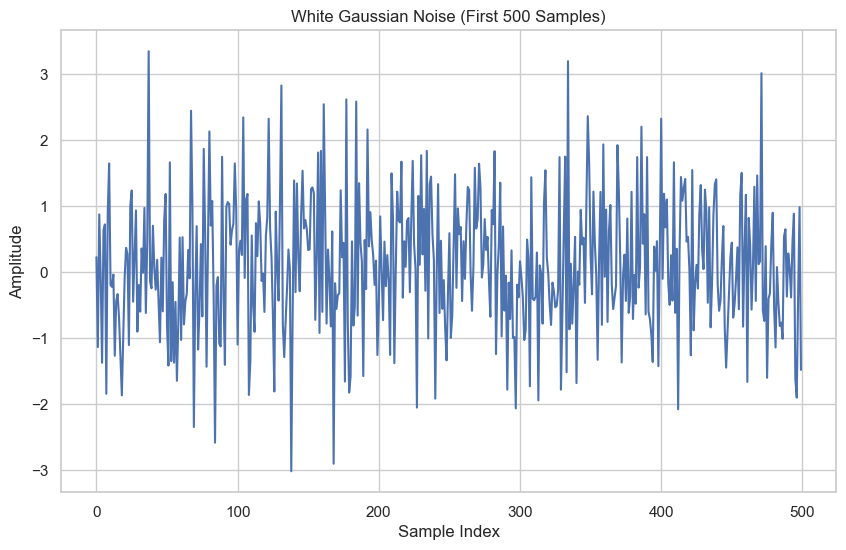

Global Mean: 0.0009
Global Variance: 1.0065
Theoretical Standard Deviation: 1.0000
Sample Standard Deviation: 1.0033


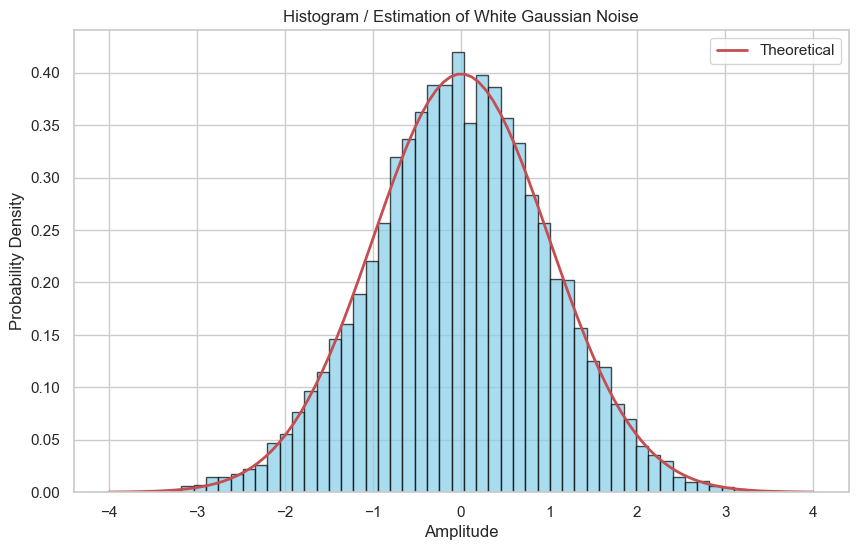

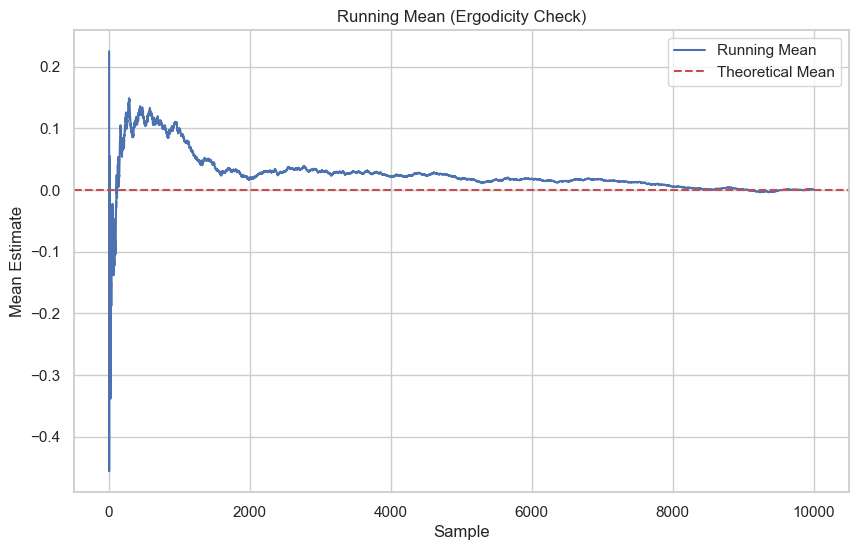

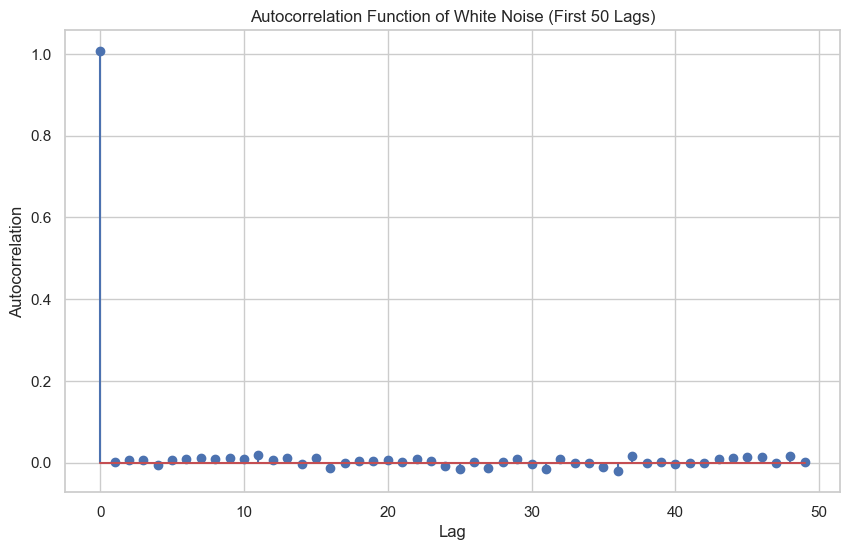

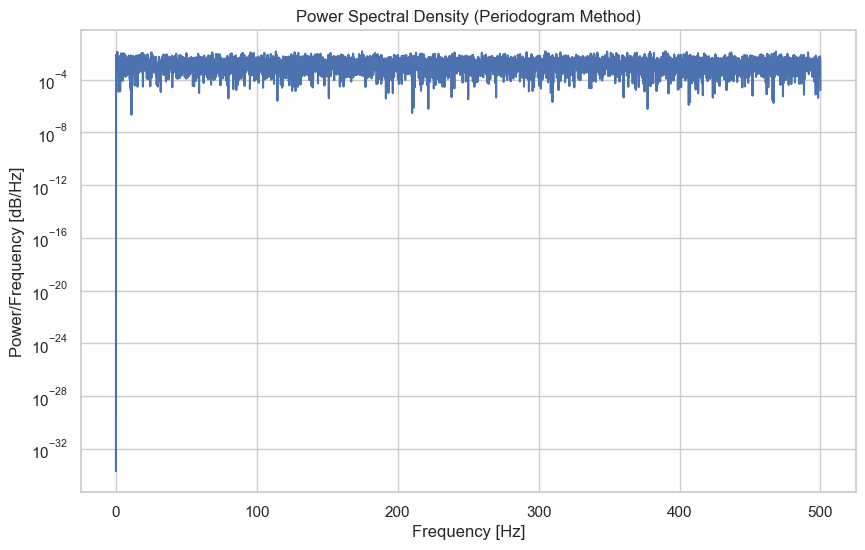

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram, welch
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = [10, 6]

N = 10000  
mean_val = 0 
std_dev = 1  

white_noise = np.random.normal(loc=mean_val, scale=std_dev, size=N)

plt.figure()
plt.plot(white_noise[:500])
plt.title("White Gaussian Noise (First 500 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

global_mean = np.mean(white_noise)
global_var = np.var(white_noise)

print(f"Global Mean: {global_mean:.4f}")
print(f"Global Variance: {global_var:.4f}")
print(f"Theoretical Standard Deviation: {std_dev:.4f}")
print(f"Sample Standard Deviation: {np.std(white_noise):.4f}")



plt.figure()
plt.hist(white_noise, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')

x = np.linspace(-4, 4, 100)
pdf = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (x - mean_val)**2 / std_dev**2)
plt.plot(x, pdf, 'r-', linewidth=2, label='Theoretical')

plt.title("Histogram / Estimation of White Gaussian Noise")
plt.xlabel("Amplitude")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

running_mean = np.cumsum(white_noise) / np.arange(1, N + 1)

plt.figure()
plt.plot(running_mean, label='Running Mean')
plt.axhline(y=mean_val, color='r', linestyle='--', label='Theoretical Mean')
plt.title("Running Mean (Ergodicity Check)")
plt.xlabel("Sample")
plt.ylabel("Mean Estimate")
plt.legend()
plt.grid(True)
plt.show()

def autocorrelation(x):
    """Compute autocorrelation of a signal"""
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:] / len(x)

acf = autocorrelation(white_noise)

plt.figure()
plt.stem(acf[:50])
plt.title("Autocorrelation Function of White Noise (First 50 Lags)")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()


fs = 1000  
f, Pxx = periodogram(white_noise, fs=fs)

plt.figure()
plt.semilogy(f, Pxx)
plt.title("Power Spectral Density (Periodogram Method)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power/Frequency [dB/Hz]")
plt.grid(True)
plt.show()